In [1]:
%matplotlib inline

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pytensor.tensor as pt
import xarray as xr

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

In [3]:
size = 100
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + rng.normal(scale=0.5, size=size)

# Add outliers
x_out = np.append(x, [0.1, 0.15, 0.2])
y_out = np.append(y, [8, 6, 9])

data = pd.DataFrame(dict(x=x_out, y=y_out))

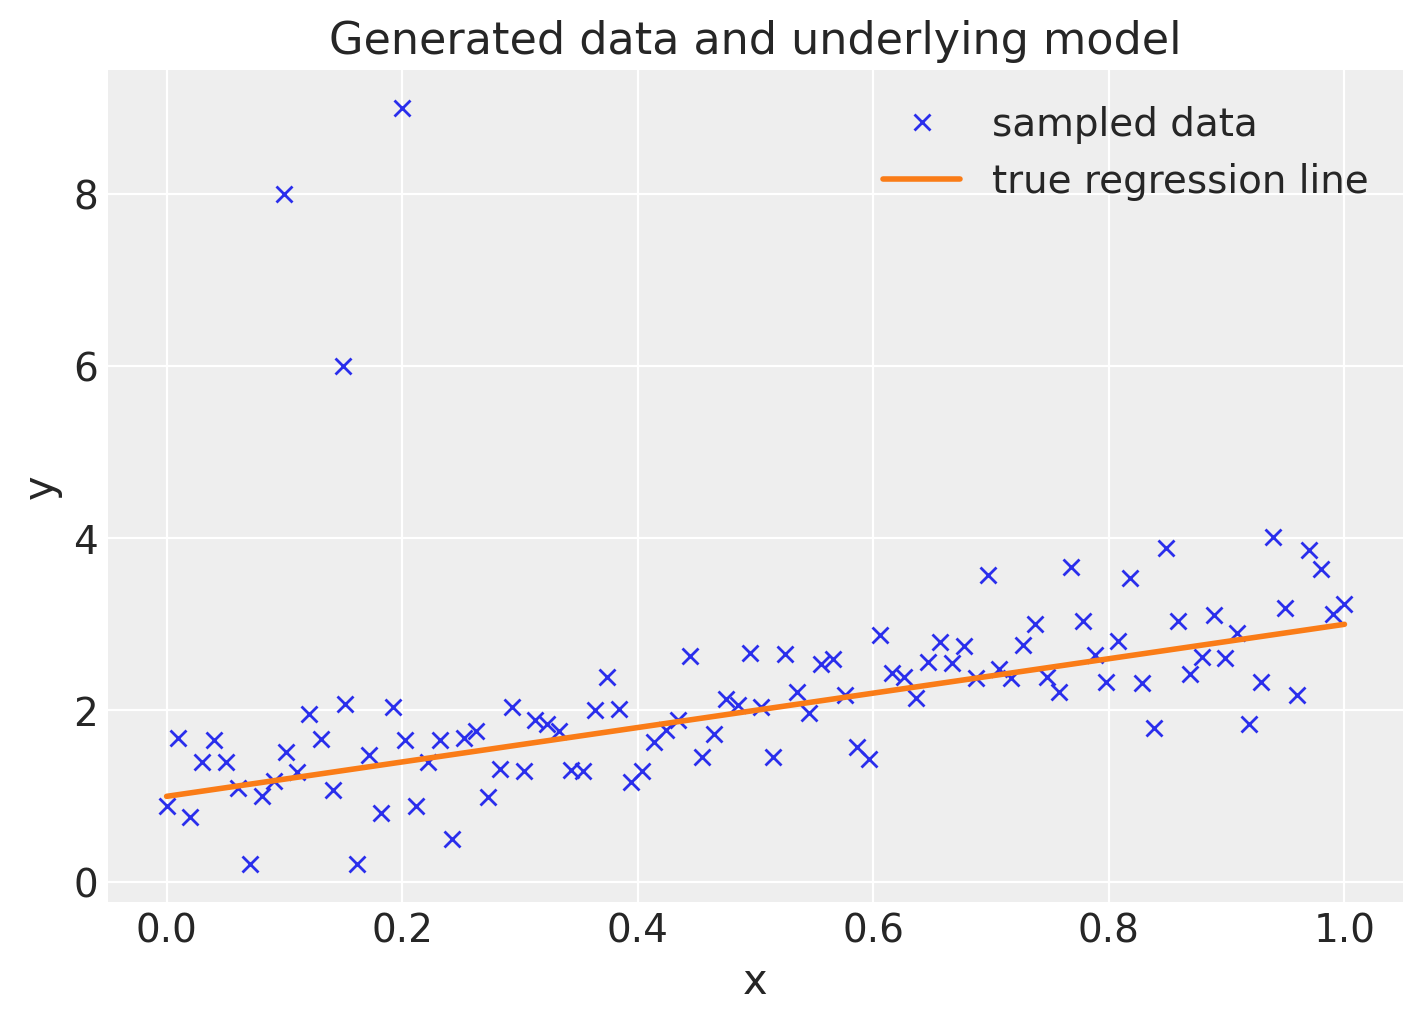

In [4]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x_out, y_out, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
plt.legend(loc=0);

In [5]:
with pm.Model() as model:
    xdata = pm.ConstantData("x", x_out, dims="obs_id")

    # define priors
    intercept = pm.Normal("intercept", mu=0, sigma=1)
    slope = pm.Normal("slope", mu=0, sigma=1)
    sigma = pm.HalfCauchy("sigma", beta=10)

    mu = pm.Deterministic("mu", intercept + slope * xdata, dims="obs_id")

    # define likelihood
    likelihood = pm.Normal("y", mu=mu, sigma=sigma, observed=y_out, dims="obs_id")

    # inference
    trace = pm.sample(draws=500, tune=200)

c:\Users\carsten.jorgensen\dev\learningbayesianstatistics\Rethinking\.venv\Lib\site-packages\pymc\data.py:273: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, slope, sigma]


Output()

Sampling 4 chains for 200 tune and 500 draw iterations (800 + 2_000 draws total) took 175 seconds.


In [6]:
trace.to_netcdf('model2')

'model2'

In [7]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data

In [12]:
trace.posterior.intercept[0,:10].values

array([1.67062019, 1.47360776, 1.68965856, 1.71234542, 1.55922161,
       1.49661344, 1.4798811 , 1.7314219 , 1.7934517 , 1.73743292])

In [13]:
trace.posterior.slope[0,:10].values

array([1.28740755, 1.52335385, 1.09213602, 1.05968725, 1.30415749,
       1.42552893, 1.54942831, 1.2444592 , 1.12634277, 0.84042839])

In [19]:
trace.posterior.mu[0,:10,1].values

array([1.6836243 , 1.48899517, 1.70069024, 1.72304933, 1.57239491,
       1.51101272, 1.49553189, 1.74399219, 1.8048289 , 1.74592209])

In [20]:
trace.posterior.intercept[0,:10].values + 0.01010101 * trace.posterior.slope[0,:10].values

array([1.6836243 , 1.48899517, 1.70069023, 1.72304933, 1.57239491,
       1.51101272, 1.49553189, 1.74399219, 1.8048289 , 1.74592209])

In [16]:
trace.constant_data.x

<xarray.DataArray 'x' (obs_id: 103)> Size: 824B
array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747475,
       0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ,
       0.1       , 0.15      , 0.2       ])
Coordinates:
  * obs_id   (obs_id) int32 412B 0 1 2 3 4 5 6 7 ... 95 96 97 98 99 100 101 102

In [21]:
with pm.Model() as model_alt:
    mu = pm.Normal("mu", mu=178, sigma=20)
    sigma = pm.Uniform("sigma", 0, 50)
    height = pm.Normal("height", mu=mu, sigma=sigma)
    # inference
    trace_alt = pm.sample(draws=100, tune=100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma, height]


Output()

Sampling 4 chains for 100 tune and 100 draw iterations (400 + 400 draws total) took 38 seconds.
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [22]:
trace_alt

Inference data with groups:
	> posterior
	> sample_stats